In [22]:
import networkx as nx
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append("..")  # Add the parent directory (where hex_maze_utils lives) to the path

from hex_maze_utils import create_empty_hex_maze, plot_hex_maze, find_all_critical_choice_points

# Load the database of different barrier sequences
barrier_df = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequences_first1000.pkl')
display(barrier_df)

,barrier_sequence,sequence_length,reward_path_lengths,choice_points
0,"[(37, 7, 39, 41, 14, 46, 20, 23, 30), (37, 39,...",5,"[[15, 17, 21], [15, 21, 19], [15, 17, 19], [23...","[{13}, {26}, {26, 13, 29}, {29}, {13}]"
1,"[(34, 36, 37, 39, 10, 45, 14, 15, 20), (34, 37...",6,"[[17, 21, 19], [19, 21, 17], [19, 15, 17], [17...","[{21}, {30}, {24}, {16, 24, 26}, {24}, {35}]"
2,"[(34, 7, 41, 11, 46, 17, 20, 28, 31)]",1,"[[23, 19, 17]]",[{35}]
3,"[(34, 10, 42, 12, 45, 18, 23, 25, 31), (34, 37...",6,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [21...","[{17}, {17, 26, 35}, {35}, {24}, {24, 17, 26},..."
4,"[(39, 9, 10, 46, 21, 22, 23, 26, 30)]",1,"[[23, 17, 17]]",[{29}]
...,...,...,...,...
995,"[(32, 34, 45, 13, 14, 15, 18, 19, 25), (32, 34...",2,"[[19, 17, 15], [19, 15, 17]]","[{35}, {24}]"
996,"[(37, 7, 40, 13, 46, 45, 18, 25, 28), (37, 7, ...",2,"[[15, 19, 17], [17, 19, 15]]","[{26}, {36}]"
997,"[(36, 10, 11, 46, 15, 21, 25, 27, 29)]",1,"[[19, 15, 21]]",[{16}]
998,"[(32, 8, 9, 41, 15, 20, 21, 27, 29), (32, 8, 9...",2,"[[17, 21, 15], [17, 15, 21]]","[{31}, {13}]"


In [37]:
def get_barrier_change(barriers_1, barriers_2):
    '''
    Given 2 barrier sets that differ by the movement of a single barrier, 
    find the barrier that was moved.
    
    Args:
    barriers_1 (set/frozenset): The first barrier set
    barriers_2 (set/frozenset): The second barrier set
    
    Returns:
    old_barrier (int): The hex location of the barrier to be moved in the first set
    new_barrier (int): The hex location the barrier was moved to in the second set
    '''
    # Find the original barrier location
    old_barrier = barriers_1 - barriers_2

    # Find the new barrier location
    new_barrier = barriers_2 - barriers_1
    
    # Return as integers instead of sets/frozensets with a single element
    return next(iter(old_barrier)), next(iter(new_barrier))


def plot_barrier_change_hex_maze(barriers, old_barrier, new_barrier):
    ''' 
    Plot a hex maze in a barrier change sequence.
    Open hexes are shown in light blue, connected by thin grey lines.
    Barriers are shown in dark grey. Choice point(s) are in yellow.
    The now-open hex where the barrier used to be is shown in light grey.
    The new barrier is shown in dark red.
    
    Args:
    barriers (set): A set defining the hexes where barriers are placed in the maze
    old_barrier (int): The hex where the barrier was in the previous maze
    new_barrier (int): The hex where the new barrier is in this maze
    '''
    
    # Create an empty maze for graph layout
    base_hex_maze = create_empty_hex_maze()
    
    # Create our actual maze
    maze = base_hex_maze.copy()
    for barrier in barriers:
        maze.remove_node(barrier)

    # Get the graph layout of the original maze
    pos = nx.kamada_kawai_layout(base_hex_maze)

    # Draw the available hexes in our maze using this layout
    nx.draw(maze, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=400)

    # Add the barriers in black
    nx.draw_networkx_nodes(base_hex_maze, pos, nodelist={b: b for b in barriers}, node_color='black', node_size=400)   
    nx.draw_networkx_labels(base_hex_maze, pos, labels={b: b for b in barriers}, font_color='white')

    # Make the choice point(s) yellow
    choice_points = find_all_critical_choice_points(maze)
    for choice_point in choice_points:
        nx.draw_networkx_nodes(base_hex_maze, pos, nodelist=[choice_point], node_color='yellow', node_size=400)
        
    # Make the old barrier location that is now an open hex light grey
    nx.draw_networkx_nodes(base_hex_maze, pos, nodelist=[old_barrier], node_color='lightgrey', node_size=400)
    
    # Make the new barrier location dark red
    nx.draw_networkx_nodes(base_hex_maze, pos, nodelist=[new_barrier], node_color='darkred', node_size=400)
    
    plt.show()

Barriers 1: frozenset({34, 36, 37, 39, 10, 45, 14, 15, 20})
Barriers 2: frozenset({34, 37, 39, 10, 45, 14, 15, 20, 26})
Barrier change: 36 -> 26


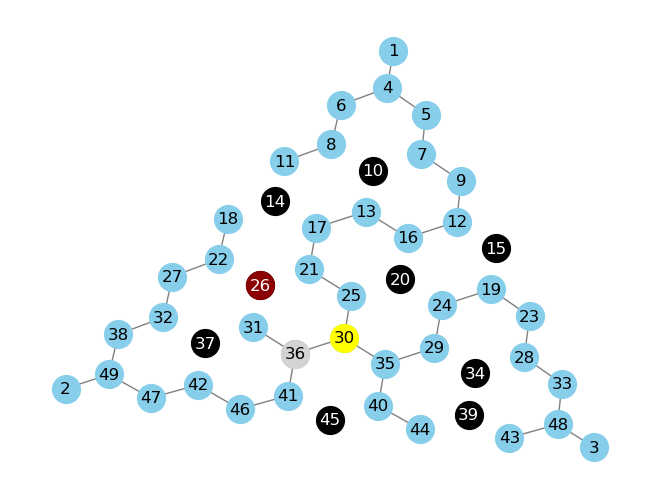

In [38]:
i = 1
barrier_sequence = barrier_df.iloc[i]['barrier_sequence']

bars1 = barrier_sequence[0]
bars2 = barrier_sequence[1]

oldb, newb = get_barrier_change(bars1, bars2)

print("Barriers 1:", bars1)
print("Barriers 2:", bars2)
print(f"Barrier change: {oldb} -> {newb}")

plot_barrier_change_hex_maze(bars2, oldb, newb)